# 2. Khám phá dữ liệu EDA

In [28]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# đọc dữ liệu
products = pd.read_csv('Product_new.csv')
reviews = pd.read_csv('Review_new.csv')

# 1. Product

In [30]:
products.head(2)

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.00,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.50,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [31]:
products.shape

(4373, 10)

In [32]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4373 non-null   int64  
 1   name         4373 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4373 non-null   float64
 4   price        4373 non-null   int64  
 5   list_price   4373 non-null   int64  
 6   brand        4373 non-null   object 
 7   group        4373 non-null   object 
 8   url          4373 non-null   object 
 9   image        4373 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 341.8+ KB


In [33]:
pd.options.display.float_format = '{:,.2f}'.format
products[['price', 'list_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,"4,373.00","2,763,501.13","5,544,076.83","7,000.00","150,000.00","487,000.00","2,680,000.00","62,690,000.00"
list_price,"4,373.00","3,893,684.92","7,900,791.25","12,000.00","279,000.00","790,000.00","3,590,000.00","82,990,000.00"


### Nhận xét:
- Giá sp có khoảng giá trị rất rộng trong khoảng 7000-62.690.000
- Giá gốc sp có khoảng giá trị rất rộng trong khoảng 12.000-82.990.000

# 1.1 Giá bán

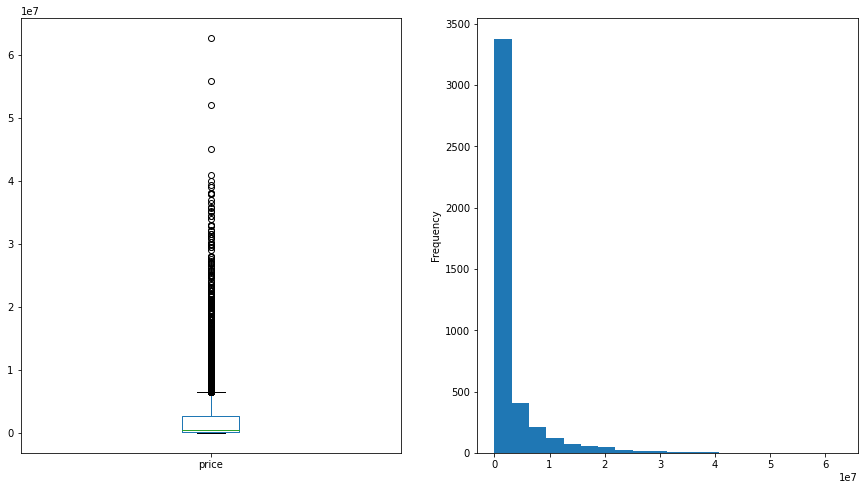

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
products.price.plot(kind = 'box', ax = ax[0])
products.price.plot(kind = 'hist', bins = 20, ax = ax[1])
plt.show()

### Nhận xét:
- Giá sp có khoảng giá trị rất rộng trong khoảng 7000-62.690.000
- Phần lớn giá sp tập trung < 3.000.000

## 1.2 Thương hiệu

In [35]:
# sp theo thương hiệu
brands = products.groupby('brand')['item_id'].count().sort_values(ascending = False)
brands

brand
OEM               1115
Samsung            199
LG                  96
Panasonic           96
Sony                95
                  ... 
KTV                  1
KBVISION-USA         1
KAPUSI               1
Joy Collection       1
xMOWI                1
Name: item_id, Length: 521, dtype: int64

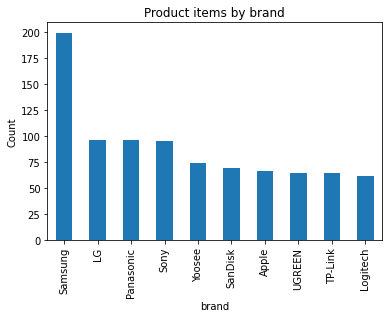

In [36]:
# thương hiệu có số lượng mã sp cao nhất: OEM
# top 10 thương hiệu có số lượng mã sp cao nhất (ngoại trừ OEM)
brands[1:11].plot(kind = 'bar')
plt.ylabel('Count')
plt.title('Product items by brand')
plt.show()

### Nhận xét:
- Ngoại trừ OEM có số lượng mã sp vượt trội (1115) thì trong top 10 có Samsung có số lượng mã sp nhiều nhất các thương hiệu khác có số lượng mã sp tương đương nhau.

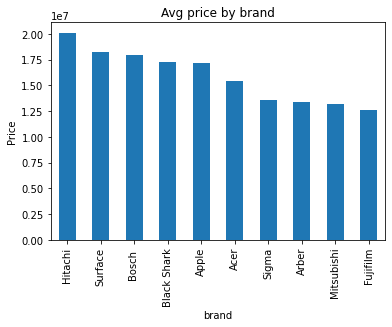

In [37]:
# giá bán theo thương hiệu
price_by_brand = products.groupby('brand').mean()['price']
price_by_brand.sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.ylabel('Price')
plt.title('Avg price by brand')
plt.show()

### Nhận xét:
- Về giá bán thì thương hiệu Hitachi có trung bình giá bán sản phẩm cao nhất.

## 1.3. Rating

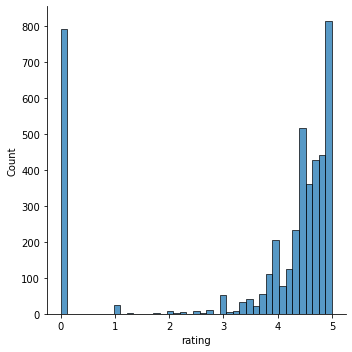

In [38]:
sns.displot(products, x = 'rating', kind = 'hist')
plt.show()

### Nhận xét:
- Rating sp trong khoảng 0-5
- Sp có rating là 0 và 5 là tương đương nhau và có số lượng khá lớn
- Phần lớn sp có rating > 4.

In [39]:
products.groupby('rating')['item_id'].count()

rating
0.00    790
1.00     24
1.30      2
1.80      1
2.00      7
2.10      1
2.20      2
2.30      4
2.50      7
2.60      1
2.70      6
2.80      4
3.00     52
3.10      5
3.20      9
3.30     17
3.40     15
3.50     40
3.60     23
3.70     54
3.80     61
3.90     49
4.00    204
4.10     77
4.20    125
4.30    233
4.40    191
4.50    326
4.60    361
4.70    427
4.80    442
4.90    220
5.00    593
Name: item_id, dtype: int64

Xem xét rating trong review của KH

In [40]:
avg_rating_cus = reviews.groupby('product_id').mean()['rating'].to_frame().reset_index()
avg_rating_cus.rename({'rating': 'avg_rating'}, axis = 1, inplace = True)
avg_rating_cus.head()

,product_id,avg_rating
0,54665,4.60
1,55897,4.63
2,104180,4.48
3,116897,4.24
4,122012,4.49


In [41]:
products = products.merge(avg_rating_cus, left_on = 'item_id', right_on = 'product_id', how = 'left')

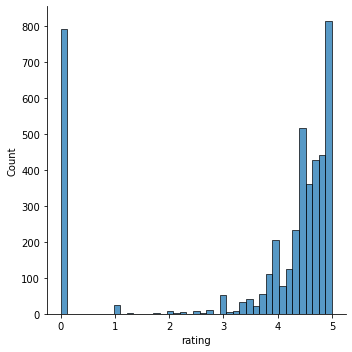

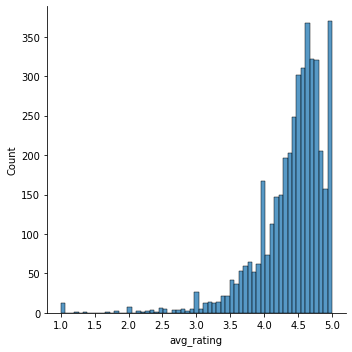

In [42]:
sns.displot(products, x = 'rating', kind = 'hist')
sns.displot(products, x = 'avg_rating', kind = 'hist')
plt.show()

### Nhận xét:
Rating của sp trong review của KH >0. Có thể kết luận điểm rating = 0 trong product là do thiếu dữ liệu.

# 2. Review

In [43]:
reviews.head()

,id,customer_id,product_id,name,rating,title,content
0,0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [44]:
reviews.shape

(361090, 7)

In [45]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361090 entries, 0 to 361089
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           361090 non-null  int64 
 1   customer_id  361090 non-null  int64 
 2   product_id   361090 non-null  int64 
 3   name         360662 non-null  object
 4   rating       361090 non-null  int64 
 5   title        361062 non-null  object
 6   content      165053 non-null  object
dtypes: int64(4), object(3)
memory usage: 19.3+ MB


In [46]:
print('Có ', reviews.shape[0], ' đánh giá cho ', reviews.groupby('product_id').count().shape[0], ' sản phẩm.')

Có  361090  đánh giá cho  4214  sản phẩm.


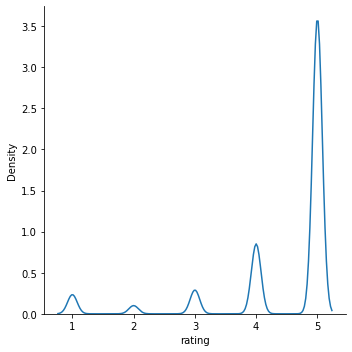

In [47]:
sns.displot(reviews, x = 'rating', kind = 'kde')
plt.show()

### Nhận xét:
- Phần lớn KH phản hồi tích cực về sp
- Nguyên nhân: SP có chất lượng tốt hoặc do KH dễ tính??

In [48]:
reviews.groupby('rating').size()

rating
1     16616
2      7098
3     20600
4     60565
5    256211
dtype: int64

### Nhận xét:
- Phần lớn đánh giá cho rating 5

## 2.1. Top 20 sp được đánh giá nhiều nhất

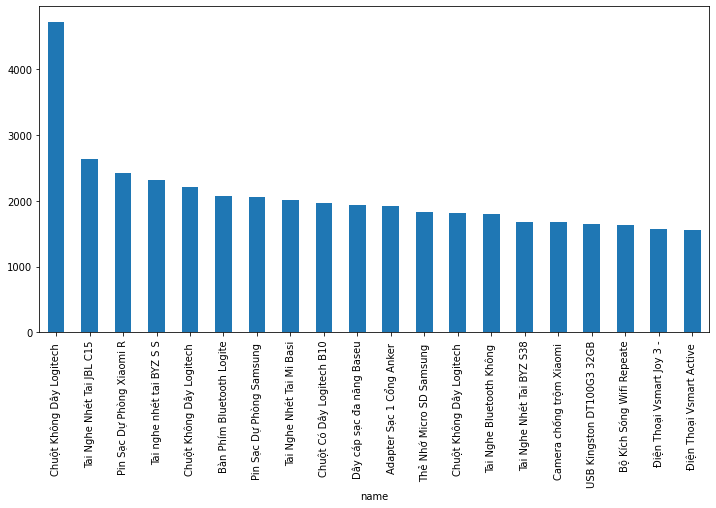

In [49]:
plt.figure(figsize = (12, 6))
top_products = reviews.groupby('product_id').count()['customer_id'].sort_values(ascending = False)[:20]
top_products.index = products[products.item_id.isin(top_products.index)]['name'].str[:25]
top_products.plot(kind = 'bar')
plt.show()

### Nhận xét:
- Các sp được đánh giá nhiều nhất là phụ kiện điện thoại, máy tính
- Chuột không dây Logitech được đánh giá nhiều nhất.

## 2.2. Top 20 KH thực hiện đánh giá nhiều nhất

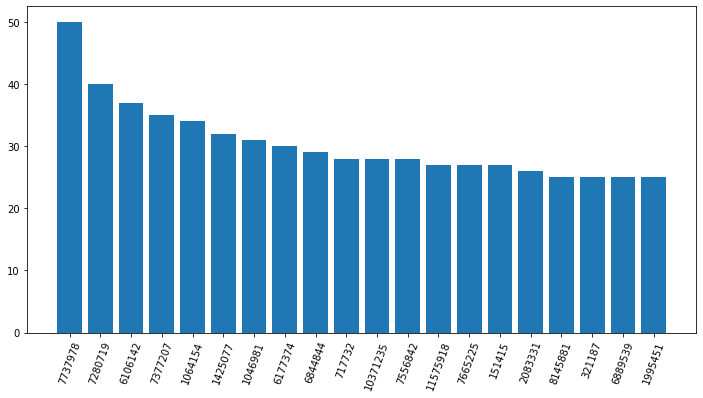

In [50]:
plt.figure(figsize = (12, 6))
top_rating_customers = reviews.groupby('customer_id').count()['product_id'].sort_values(ascending = False)[:20]
plt.bar(x = [str(x) for x in top_rating_customers.index], height = top_rating_customers.values)
plt.xticks(rotation = 70)
plt.show()

## Nhận xét:
- KH có mã số 7737978 thực hiện nhiều đánh giá nhất (cho 50 sp)
- Top 20 chủ yếu thực hiện đánh giá cho khoảng 30-40 sp.

In [51]:
products.head(2)

,item_id,name,description,rating,price,list_price,brand,group,url,image,product_id,avg_rating
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.00,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,"48,102,821.00",4.05
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.50,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,"52,333,193.00",4.50


In [52]:
reviews.head(2)

,id,customer_id,product_id,name,rating,title,content
0,0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."


In [53]:
# Lựa chọn thuộc tính cần thiết cho bài toán:
products = products[['item_id', 'name', 'description']]
reviews = reviews[['id', 'customer_id', 'product_id', 'rating']]

In [54]:
reviews.to_csv('Reviews.csv')
products.to_csv('Products.csv', index = False)